In [1]:
import math
import numpy as np
import ceo
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib inline

In [2]:
BM = ceo.BendingModes(N_MODE=0,N_SURF=7)

# Irregular grid

In [3]:
(x,y,b) = BM.load()

In [4]:
b.host().shape

(1, 27685)

In [5]:
tid = ceo.StopWatch()

In [6]:
NI = 101
di = 8.362/(NI-1)

In [7]:
def bending_modes(x):
    tid.tic()
    (B,dBdx,dBdy) = BM.interpolate(NI,di,x)
    tid.toc()

    print tid.elapsedTime
    fig, ax = plt.subplots(ncols=3)
    h = ax[0].imshow(B.host(),interpolation='none',origin='lower')
    ax[1].imshow(dBdx.host(),interpolation='none',origin='lower')
    ax[2].imshow(dBdy.host(),interpolation='none',origin='lower')

635.950866699


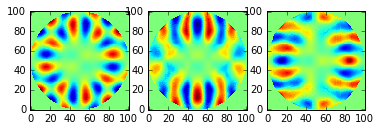

In [8]:
interact(bending_modes,x=widgets.IntSlider(min=1,max=162,step=1,continuous_update=False))

# Regular grid

In [9]:
b = BM.load('regular')

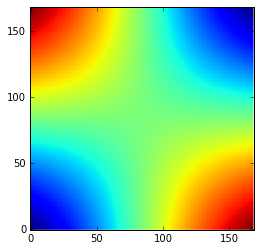

In [10]:
plt.imshow(np.reshape(b.host(),(169,169)),interpolation='none',origin='lower')

In [11]:
NI = 501
di = 8.362/(NI-1)

In [12]:
def bending_modes_reg(x,N=167):
    di = 8.362/(N-1)    
    tid.tic()
    (B,dBdx,dBdy) = BM.interpolate(N,di,x,grid='regular')
    tid.toc()

    print tid.elapsedTime
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(10,10)
    h = ax[0].imshow(B.host(),interpolation='none',origin='lower')
    ax[1].imshow(dBdx.host(),interpolation='none',origin='lower')
    ax[2].imshow(dBdy.host(),interpolation='none',origin='lower')

0.892063975334


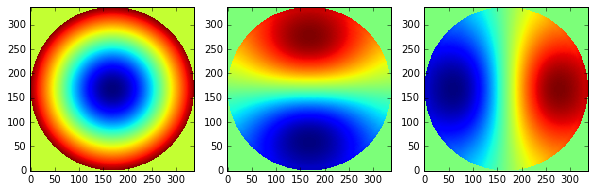

In [13]:
interact(bending_modes_reg,x=widgets.IntSlider(min=1,max=162,step=1,continuous_update=False),
         N=widgets.IntSlider(min=32,max=501,step=1,continuous_update=False))

In [14]:
np.asarray(BM.b)*2

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [15]:
BM.b[0,3] = 2

# GMT

In [1]:
import math
import numpy as np
import ceo
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib inline

In [2]:
gmt = ceo.GMT_MX(M1_mirror_modes=u"bending modes",M1_N_MODE=42)

In [3]:
src = ceo.Source("R",rays_box_sampling=401,rays_box_size=25.5,rays_origin=[0,0,25])

In [4]:
gmt.M1.modes.a = np.random.randn(7,42)*1e-7
gmt.M1.modes.update()
gmt.propagate(src)

In [5]:
data = np.load("BM_coefs.npz")
q = data["q"]

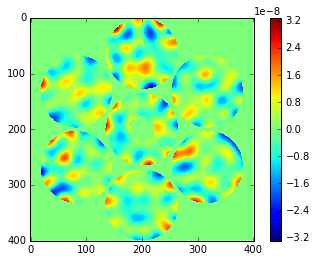

In [6]:
src.reset()
gmt.M1.modes.reset()
gmt.M1.modes.a = q
gmt.M1.modes.update()
gmt.propagate(src)
plt.imshow(src.phase.host(),interpolation='none')
plt.colorbar()